In [1]:
'''
프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
첫 번째 프로젝트에서는 우리가 오늘 많은 시간을 들여서 직접 실습해 보았던 모델 설계, 손실함수 정의와 기울기 계산을 구현해 보겠습니다.

새로운 데이터로 프로젝트를 진행하지만, 과정은 모두 동일합니다. 함께 진행했던 과정과 코드를 참고하여 충분히 고민한 후 진행해 보세요.

데이터는 sklearn.datasets에 있는 데이터 중 하나인 당뇨병 데이터를 사용하겠습니다.

데이터에 관한 정보를 다음 글에서 살펴보세요. 데이터에 대한 이해는 언제나 첫 번째로 해야하는 필수 과정입니다!

다음 과정을 차례대로 진행해주세요!

(1) 데이터 가져오기
sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
diabetes의 data를 df_X에, target을 df_y에 저장해주세요.
'''

from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

In [2]:
'''
(2) 모델에 입력할 데이터 X 준비하기
df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.
'''

import numpy as np

X = np.array(df_X)

print(type(X), X.dtype)

<class 'numpy.ndarray'> float64


In [3]:
'''
(3) 모델에 예측할 데이터 y 준비하기
df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.
'''

y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


In [4]:
'''
(4) train 데이터와 test 데이터로 분리하기
X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.
'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [5]:
'''
+ 특성 스케일링 부분추가
'''

# 특성 스케일링 (표준화)
mean = X_train.mean(axis=0)
std  = X_train.std(axis=0)

# 학습 데이터와 테스트 데이터에 동일한 평균·표준편차 적용 (평균 0, 표준편차 1)
X_train = (X_train - mean) / std
X_test  = (X_test  - mean) / std


In [6]:
'''
(5) 모델 준비하기
입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
모델 함수를 구현해주세요.
'''

W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


In [7]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [8]:
'''
(6) 손실함수 loss 정의하기
손실함수를 MSE 함수로 정의해주세요.
'''

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [9]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [10]:
'''
(7) 기울기를 구하는 gradient 함수 구현하기
기울기를 계산하는 gradient 함수를 구현해주세요.
'''

def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [11]:
'''
(8) 하이퍼 파라미터인 학습률 설정하기
학습률, learning rate 를 설정해주세요
만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.
'''

LEARNING_RATE = 0.01 # 0.001 -> 0.01 로 수정

In [12]:
'''
(9) 모델 학습하기
정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.
'''

%timeit -n 1 -r 1
global W, b

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 3334.5366
Iteration 200 : Loss 2905.9943
Iteration 300 : Loss 2896.6743
Iteration 400 : Loss 2895.4322
Iteration 500 : Loss 2894.4420
Iteration 600 : Loss 2893.4996
Iteration 700 : Loss 2892.5930
Iteration 800 : Loss 2891.7199
Iteration 900 : Loss 2890.8788
Iteration 1000 : Loss 2890.0684


In [13]:
'''
(10) test 데이터에 대한 성능 확인하기
test 데이터에 대한 성능을 확인해주세요.
'''

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2885.8586090435083)

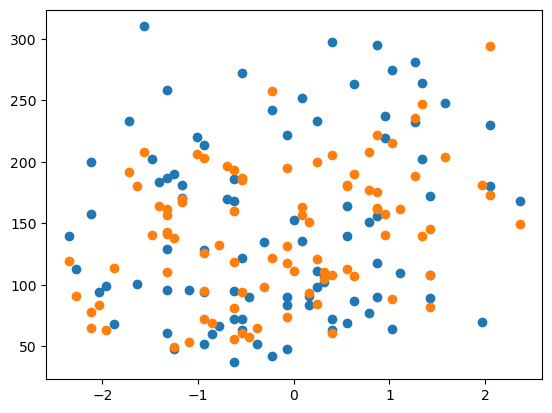

In [14]:
'''
(11) 정답 데이터와 예측한 데이터 시각화하기
x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.
'''

import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()